In [35]:
import numpy as np
import matplotlib.pyplot as plt
from queueing_system_simulation import QueuingSystemSimulation
from queueing_system_analysis import *

Tests

In [36]:
def simulate(n, m, lambd, mu, v, test_time=10000):
    qs = QueuingSystemSimulation.simulate_queuing_system(n, m, lambd, mu, v, test_time)
    empirical_characteristics = calculate_empirical_characteristics(qs)
    theoretical_characteristics = calculate_theoretical_characteristics(n, m, lambd, mu, v)
    return theoretical_characteristics, empirical_characteristics

def test_analyse(n, m, lambd, mu, v, test_time=10000):
    theoretical_characteristics, empirical_characteristics = simulate(n, m, lambd, mu, v, test_time)

    print(f'Характеристики СМО: n={n}, m={m}, lambda={lambd}, mu={mu}, v={v}')
    display_characteristics(theoretical_characteristics, empirical_characteristics)

    t_estimation_list = theoretical_characteristics[0] + [
        theoretical_characteristics[i] for i in range(1, len(theoretical_characteristics))
    ]
    e_estimation_list = empirical_characteristics[0] + [
        empirical_characteristics[i] for i in range(1, len(empirical_characteristics))
    ]
    xi_2_estimation = get_xi_2(e_estimation_list, t_estimation_list)
    print('Xi-квадрат:', xi_2_estimation)

    plot_graphs(theoretical_characteristics, empirical_characteristics)

Характеристики СМО: n=3, m=3, lambda=2, mu=1, v=1
                                               Теоретические характеристики    Эмпирические характеристики
-------------------------------------------  ------------------------------  -----------------------------
p0                                                                0.135952                       0.138971
p1                                                                0.271903                       0.274719
p2                                                                0.271903                       0.270287
p3                                                                0.181269                       0.178361
p4                                                                0.0906344                      0.090062
p5                                                                0.0362538                      0.0356621
p6                                                                0.0120846                      0.

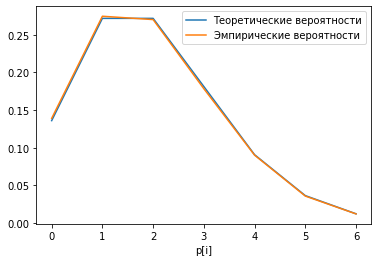

In [37]:
test_analyse(n = 3, m = 3, lambd = 2, mu = 1, v = 1)

Характеристики СМО: n=3, m=2, lambda=5, mu=1, v=2
                                               Теоретические характеристики    Эмпирические характеристики
-------------------------------------------  ------------------------------  -----------------------------
p0                                                                0.0133249                       0.014646
p1                                                                0.0666244                       0.068776
p2                                                                0.166561                        0.167045
p3                                                                0.277602                        0.27386
p4                                                                0.277602                        0.275024
p5                                                                0.198287                        0.20065
Q (относительная пропускная способность)                          0.801713                      

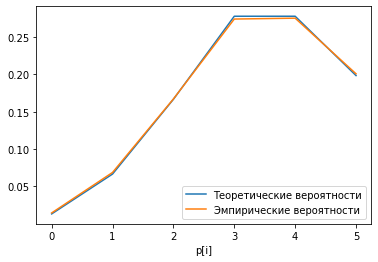

In [38]:
test_analyse(n = 3, m = 2, lambd = 5, mu = 1, v = 2)

Характеристики СМО: n=8, m=6, lambda=18, mu=4, v=3
                                               Теоретические характеристики    Эмпирические характеристики
-------------------------------------------  ------------------------------  -----------------------------
p0                                                              0.011077                       0.0106184
p1                                                              0.0498463                      0.0499136
p2                                                              0.112154                       0.111768
p3                                                              0.168231                       0.167694
p4                                                              0.18926                        0.189314
p5                                                              0.170334                       0.171016
p6                                                              0.127751                       0.12806
p7    

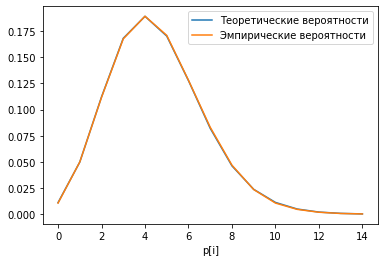

In [39]:
test_analyse(n = 8, m = 6, lambd = 18, mu = 4, v = 3)

Характеристики СМО: n=2, m=30, lambda=50, mu=3, v=2
                                               Теоретические характеристики    Эмпирические характеристики
-------------------------------------------  ------------------------------  -----------------------------
p0                                                              2.74041e-10                    1.99898e-06
p1                                                              4.56735e-09                    1.99898e-06
p2                                                              3.80612e-08                    1.99898e-06
p3                                                              2.37883e-07                    1.99898e-06
p4                                                              1.18941e-06                    1.99898e-06
p5                                                              4.95589e-06                    3.99797e-06
p6                                                              1.76996e-05                 

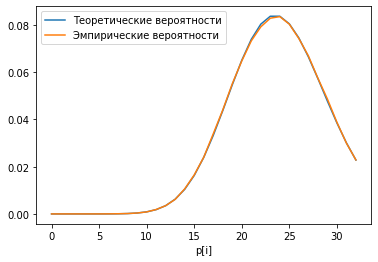

In [40]:
test_analyse(n = 2, m = 30, lambd = 50, mu = 3, v = 2)

Graphs, that prove QSS stable state

In [41]:
def plot_stabilization_process(n, m, lambd, mu, v, test_time_max=10000, count_measurements=100):
    times = [i * count_measurements for i in range(1, int(test_time_max / count_measurements + 1))]
    p_count = n + m + 1
    p_list = [[] for _ in range(p_count)]
    p_theoretical = []
    for time in times:
        theoretical_characteristics, empirical_characteristics = simulate(n, m, lambd, mu, v, time)
        for i in range(p_count):
            p_list[i].append(empirical_characteristics[0][i])
        if len(p_theoretical) == 0:
            p_theoretical = theoretical_characteristics[0]

    fig, axes_list = plt.subplots(ncols=1, nrows=p_count, figsize=(12, 18),
                                    gridspec_kw={'height_ratios': [1 for _ in range(p_count)], 'width_ratios': [1]})

    for i in range(p_count):
        axes_list[i].set_title(f'p{i}')
        axes_list[i].plot(times, [p_theoretical[i]]*len(times), '-k')
        axes_list[i].fill_between(times, y1=p_list[i], color=(np.random.random(), np.random.random(), np.random.random()), step='post', alpha=0.5)
    fig.tight_layout()

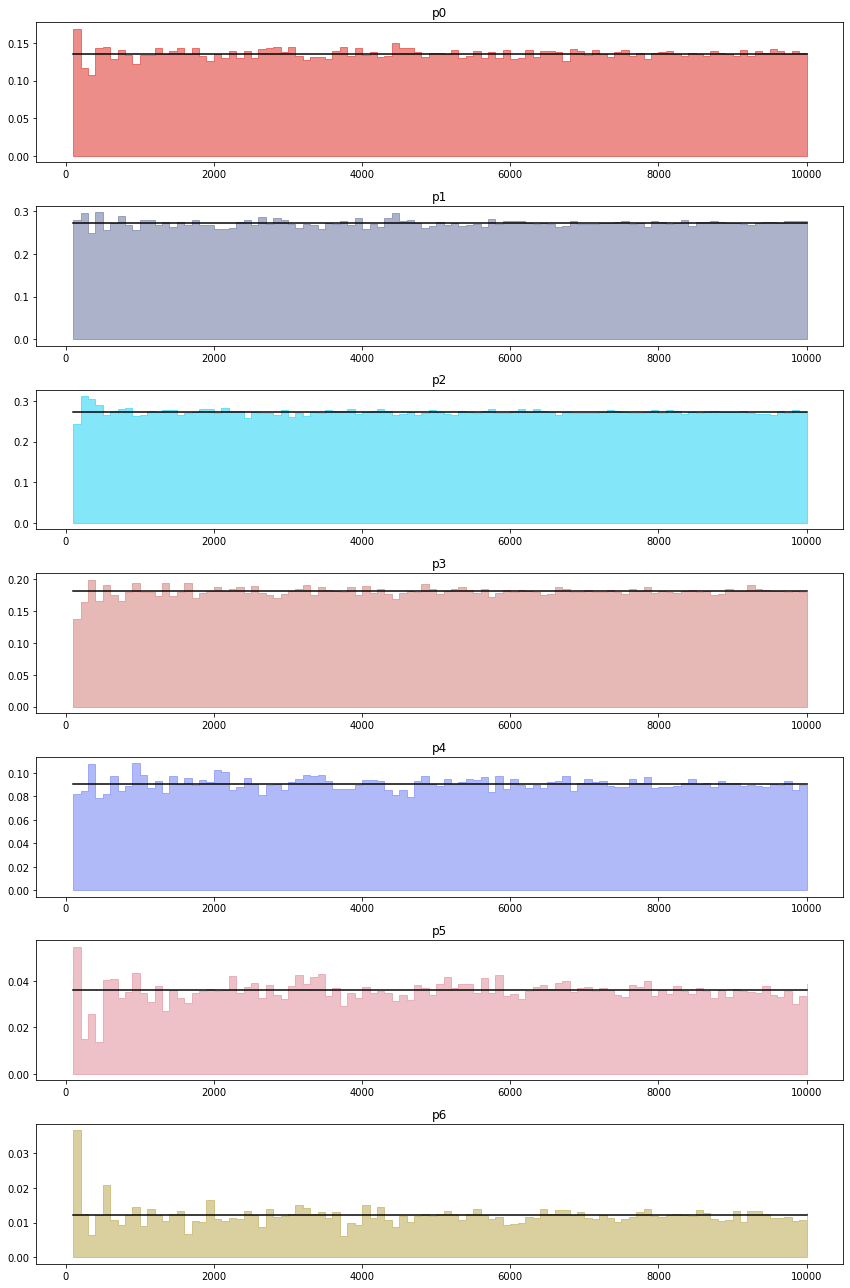

In [42]:
plot_stabilization_process(n = 3, m = 3, lambd = 2, mu = 1, v = 1)